# TUGAS
1. Identifikasi dataset tersebut
2. Ada gak masalah bisnis yang bisa muncul dari dataset tersebut
3. Coba buat 5-10 problem yang bisa muncul, lalu  tackle masalah tersebut (lakukan analysis untuk solve masalahnya)
4. Berikan kesimpulan dan rekomendasi dari kalian untuk si penyedia jasa


Free analysis, cari problem statement sendiri, lalu solve masalahnya.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [31]:
rental = pd.read_csv("london_merged.csv")
rental.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Metadata:
---
1. "timestamp" - timestamp field for grouping the data
2. "cnt" - the count of a new bike shares
3. "t1" - real temperature in C
4. "t2" - temperature in C "feels like"
5. "hum" - humidity in percentage
6. "wind_speed" - wind speed in km/h
7. "weather_code" - category of the weather
8. "is_holiday" - boolean field - 1 holiday / 0 non holiday
9. "is_weekend" - boolean field - 1 if the day is weekend
10. "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 
- 94 = Freezing Fog

# Analisis Pengaruh Cuaca, Kecepatan Angin, Kelembapan, dan Musim terhadap Rental Sepeda

Berdasarkan hipotesis bahwa cnt (jumlah rental sepeda) dipengaruhi oleh:
1. **Cuaca** (weather_code)
2. **Kecepatan Angin** (wind_speed) 
3. **Kelembapan** (hum)
4. **Musim** (season)

In [32]:
# Explorasi dasar dataset
print("Shape dataset:", rental.shape)
print("\nInfo dasar:")
rental.info()
print()
print("\nStatistik deskriptif untuk cnt:")
rental['cnt'].describe().reset_index()

Shape dataset: (17414, 10)

Info dasar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Statistik deskriptif untuk cnt:


,index,cnt
0,count,17414.000000
1,mean,1143.101642
2,std,1085.108068
3,min,0.000000
4,25%,257.000000
5,50%,844.000000
6,75%,1671.750000
7,max,7860.000000


## 1. Analisis Pengaruh Cuaca (Weather Code) terhadap Rental Sepeda
- tidak perlu pakai jurnal ilmiah, karena sudah sangat jelas bahwa cuaca buruk (hujan, badai, salju) akan mengurangi keinginan orang untuk bersepeda.

In [33]:
# Tabel analisis cuaca
weather_analysis = rental.groupby('weather_code').agg({
    'cnt': ['mean', 'sum', 'count', 'std'],
    't1': 'mean',
    'hum': 'mean',
    'wind_speed': 'mean'
}).round(2).reset_index()

# Flatten column names
weather_analysis.columns = ['weather_code', 'avg_cnt', 'total_cnt', 'count_records', 'std_cnt', 'avg_temp', 'avg_humidity', 'avg_wind_speed']

# Tambahkan deskripsi cuaca
weather_desc = {
    1: 'Clear/Mostly Clear',
    2: 'Scattered Clouds', 
    3: 'Broken Clouds',
    4: 'Cloudy',
    7: 'Rain/Light Rain',
    10: 'Rain with Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing Fog'
}

weather_analysis['weather_description'] = weather_analysis['weather_code'].map(weather_desc)
weather_analysis = weather_analysis.sort_values('avg_cnt', ascending=False)

print("TABEL: Pengaruh Cuaca terhadap Rental Sepeda")
print("="*60)
display(weather_analysis[['weather_code', 'weather_description', 'avg_cnt', 'total_cnt', 'count_records']])

TABEL: Pengaruh Cuaca terhadap Rental Sepeda


,weather_code,weather_description,avg_cnt,total_cnt,count_records
1,2.0,Scattered Clouds,1496.18,6035580,4034
2,3.0,Broken Clouds,1195.12,4243887,3551
0,1.0,Clear/Mostly Clear,1162.09,7146847,6150
4,7.0,Rain/Light Rain,712.97,1526461,2141
3,4.0,Cloudy,635.23,929978,1464
5,10.0,Rain with Thunderstorm,583.43,8168,14
6,26.0,Snowfall,250.85,15051,60


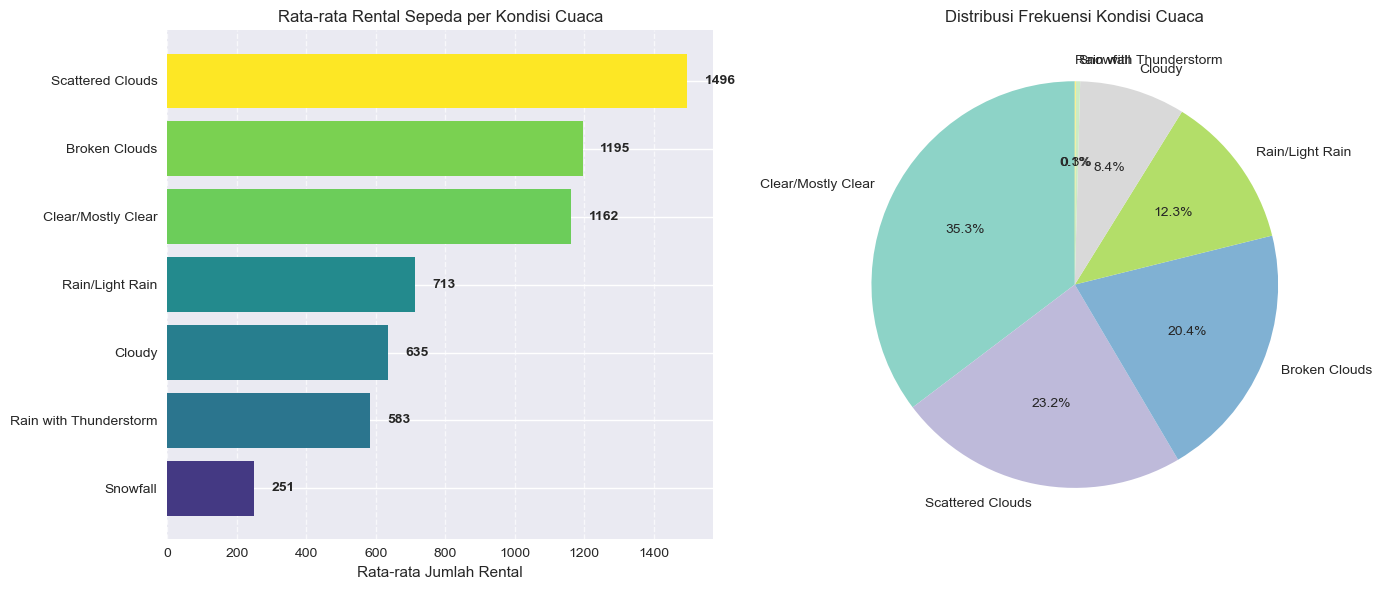

Cuaca terbaik untuk rental: Scattered Clouds dengan rata-rata 1496 rental


In [34]:
# Visualisasi pengaruh cuaca terhadap rental sepeda
plt.figure(figsize=(14,6))

# Subplot 1: Bar chart rata-rata rental per cuaca
plt.subplot(1,2,1)
weather_for_viz = weather_analysis.sort_values('avg_cnt', ascending=True)
bars = plt.barh(weather_for_viz['weather_description'], weather_for_viz['avg_cnt'], 
                color=plt.cm.viridis(weather_for_viz['avg_cnt']/weather_for_viz['avg_cnt'].max()))

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2., 
             f'{width:.0f}', ha='left', va='center', fontweight='bold')

plt.title('Rata-rata Rental Sepeda per Kondisi Cuaca')
plt.xlabel('Rata-rata Jumlah Rental')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Subplot 2: Pie chart distribusi frekuensi cuaca
plt.subplot(1,2,2)
weather_freq = weather_analysis.sort_values('count_records', ascending=False)
colors = plt.cm.Set3(np.linspace(0, 1, len(weather_freq)))

plt.pie(weather_freq['count_records'], 
         labels=weather_freq['weather_description'],
         autopct='%1.1f%%',
         colors=colors,
         startangle=90)
plt.title('Distribusi Frekuensi Kondisi Cuaca')

plt.tight_layout()
plt.show()

print(f"Cuaca terbaik untuk rental: {weather_analysis.iloc[0]['weather_description']} dengan rata-rata {weather_analysis.iloc[0]['avg_cnt']:.0f} rental")

## 2. Analisis Pengaruh Kecepatan Angin terhadap Rental Sepeda
- "Aerodynamic drag in cycling pelotons: New insights by CFD simulation and wind tunnel testing," dapat disimpulkan bahwa kecepatan (angin) memang membuat orang lebih berpikir dua kali untuk bersepeda, terutama sendiri, karena hambatan utamanya adalah aerodinamika (drag), yang akan sangat terasa pada kecepatan tinggi. [sumber jurnal ilmiah](https://www.sciencedirect.com/science/article/pii/S0167610518303751)

In [ ]:
# Kategorisasi kecepatan angin ( kurang tepat unruk avg harusnya count atau sum)
def categorize_wind_speed(wind_speed):
    if wind_speed < 10:
        return 'Tenang (< 10 km/h)'
    elif wind_speed < 20:
        return 'Sedang (10-20 km/h)'
    elif wind_speed < 30:
        return 'Kencang (20-30 km/h)'
    else:
        return 'Sangat Kencang (> 30 km/h)'

rental['wind_category'] = rental['wind_speed'].apply(categorize_wind_speed)

# Tabel analisis kecepatan angin
wind_analysis = rental.groupby('wind_category').agg({
    'cnt': ['mean', 'sum', 'count', 'std'],
    'wind_speed': ['min', 'max', 'mean'],
    't1': 'mean'
}).round(2).reset_index()

# Flatten column names
wind_analysis.columns = ['wind_category', 'avg_cnt', 'total_cnt', 'count_records', 'std_cnt', 
                        'min_wind', 'max_wind', 'avg_wind', 'avg_temp']

wind_analysis = wind_analysis.sort_values('avg_cnt', ascending=False)

print("TABEL: Pengaruh Kecepatan Angin terhadap Rental Sepeda")
display(wind_analysis[['wind_category', 'avg_cnt', 'total_cnt', 'count_records', 'avg_wind']])

TABEL: Pengaruh Kecepatan Angin terhadap Rental Sepeda


,wind_category,avg_cnt,total_cnt,count_records,avg_wind
0,Kencang (20-30 km/h),1361.02,5292991,3889,23.77
2,Sedang (10-20 km/h),1169.62,9855216,8426,14.72
1,Sangat Kencang (> 30 km/h),1095.41,1081171,987,34.25
3,Tenang (< 10 km/h),894.11,3676594,4112,6.53


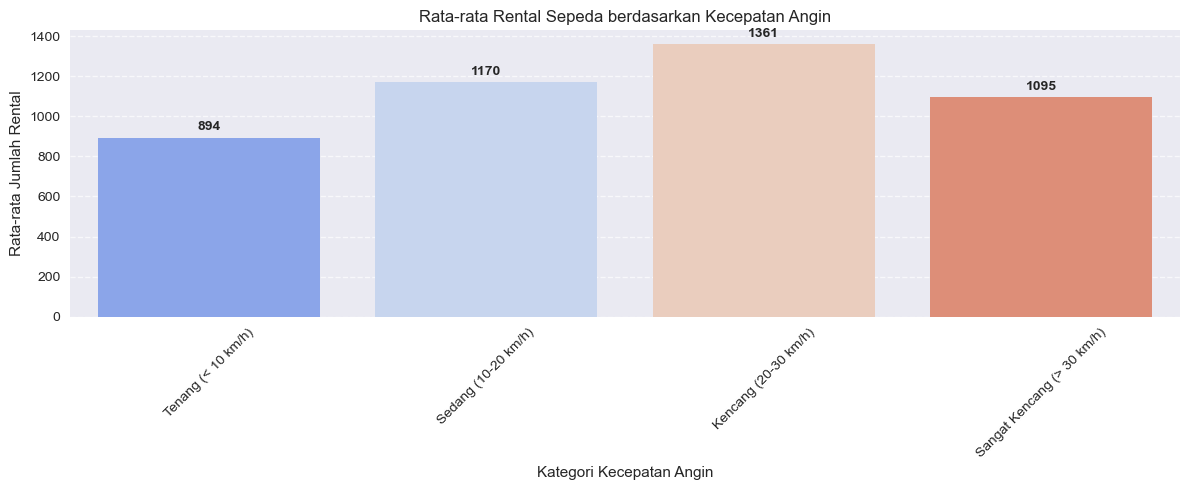

Kecepatan angin optimal: Kencang (20-30 km/h) dengan rata-rata 1361 rental


In [36]:
# Visualisasi pengaruh kecepatan angin
plt.figure(figsize=(12,5))

# Bar chart
bar_plot = sns.barplot(data=rental, x='wind_category', y='cnt', 
                       order=['Tenang (< 10 km/h)', 'Sedang (10-20 km/h)', 'Kencang (20-30 km/h)', 'Sangat Kencang (> 30 km/h)'],
                       palette='coolwarm', errorbar=None)

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', padding=3, fontsize=10, fontweight='bold')

plt.title('Rata-rata Rental Sepeda berdasarkan Kecepatan Angin')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Rata-rata Jumlah Rental')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Kecepatan angin optimal: {wind_analysis.iloc[0]['wind_category']} dengan rata-rata {wind_analysis.iloc[0]['avg_cnt']:.0f} rental")

## 3. Analisis Pengaruh Kelembapan terhadap Rental Sepeda
- Korelasi antara kelembaban tinggi dan keengganan beraktivitas (seperti bersepeda) memang ada, karena kelembaban tinggi secara fisiologis membuat olahraga terasa lebih sulit dan tidak nyaman. [Sumber Jurnal Ilmiah](https://share.google/z20nFfzSTgINFnMBE)

In [37]:
# Kategorisasi kelembapan
def categorize_humidity(humidity):
    if humidity < 40:
        return 'Rendah (< 40%)'
    elif humidity < 60:
        return 'Sedang (40-60%)'
    elif humidity < 80:
        return 'Tinggi (60-80%)'
    else:
        return 'Sangat Tinggi (> 80%)'

rental['humidity_category'] = rental['hum'].apply(categorize_humidity)

# Tabel analisis kelembapan
humidity_analysis = rental.groupby('humidity_category').agg({
    'cnt': ['mean', 'sum', 'count', 'std'],
    'hum': ['min', 'max', 'mean'],
    't1': 'mean'
}).round(2).reset_index()

# Flatten column names
humidity_analysis.columns = ['humidity_category', 'avg_cnt', 'total_cnt', 'count_records', 'std_cnt',
                           'min_hum', 'max_hum', 'avg_hum', 'avg_temp']

humidity_analysis = humidity_analysis.sort_values('avg_cnt', ascending=False)

print("TABEL: Pengaruh Kelembapan terhadap Rental Sepeda")
print("="*60)
display(humidity_analysis[['humidity_category', 'avg_cnt', 'total_cnt', 'count_records', 'avg_hum']])

TABEL: Pengaruh Kelembapan terhadap Rental Sepeda


,humidity_category,avg_cnt,total_cnt,count_records,avg_hum
0,Rendah (< 40%),2568.33,865528,337,35.24
2,Sedang (40-60%),1944.41,6045165,3109,51.49
3,Tinggi (60-80%),1118.93,8783609,7850,70.98
1,Sangat Tinggi (> 80%),688.41,4211670,6118,86.67


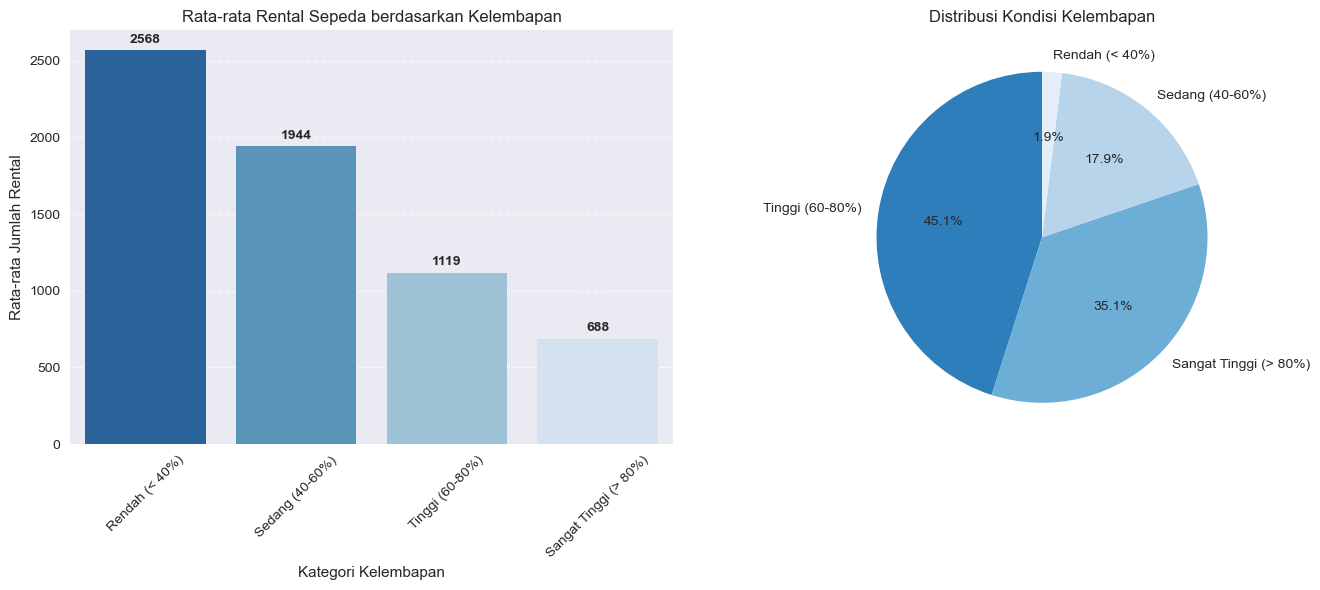

Kelembapan optimal: Rendah (< 40%) dengan rata-rata 2568 rental


In [38]:
# Visualisasi pengaruh kelembapan
plt.figure(figsize=(14,6))

# Subplot 1: Bar chart
plt.subplot(1,2,1)
humidity_order = ['Rendah (< 40%)', 'Sedang (40-60%)', 'Tinggi (60-80%)', 'Sangat Tinggi (> 80%)']
bar_plot = sns.barplot(data=rental, x='humidity_category', y='cnt', 
                       order=humidity_order, palette='Blues_r', errorbar=None)

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', padding=3, fontsize=10, fontweight='bold')

plt.title('Rata-rata Rental Sepeda berdasarkan Kelembapan')
plt.xlabel('Kategori Kelembapan')
plt.ylabel('Rata-rata Jumlah Rental')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Pie chart distribusi kelembapan
plt.subplot(1,2,2)
humidity_freq = rental['humidity_category'].value_counts()
colors = plt.cm.Blues_r(np.linspace(0.3, 0.9, len(humidity_freq)))

plt.pie(humidity_freq.values, 
         labels=humidity_freq.index,
         autopct='%1.1f%%',
         colors=colors,
         startangle=90)
plt.title('Distribusi Kondisi Kelembapan')

plt.tight_layout()
plt.show()

print(f"Kelembapan optimal: {humidity_analysis.iloc[0]['humidity_category']} dengan rata-rata {humidity_analysis.iloc[0]['avg_cnt']:.0f} rental")

## 4. Analisis Pengaruh Musim terhadap Rental Sepeda
- tidak perlu pakai jurnal ilmiah, karena sudah sangat jelas bahwa musim dingin (winter) akan mengurangi keinginan orang untuk bersepeda dibanding musim lain (spring, summer, fall).

In [45]:
# Mapping musim
season_mapping = {
    0: 'Spring (Musim Semi)',
    1: 'Summer (Musim Panas)', 
    2: 'Fall (Musim Gugur)',
    3: 'Winter (Musim Dingin)'
}

rental['season_name'] = rental['season'].map(season_mapping)

# Tabel analisis musim
season_analysis = rental.groupby('season_name').agg({
    'cnt': ['mean', 'sum', 'count', 'std'],
    't1': ['mean', 'min', 'max'],
    'hum': 'mean',
    'wind_speed': 'mean'
}).round(2).reset_index()

# Flatten column names
season_analysis.columns = ['season_name', 'avg_cnt', 'total_cnt', 'count_records', 'std_cnt',
                          'avg_temp', 'min_temp', 'max_temp', 'avg_humidity', 'avg_wind']

season_analysis = season_analysis.sort_values('avg_cnt', ascending=False)

print("TABEL: Pengaruh Musim terhadap Rental Sepeda")
display(season_analysis[['season_name', 'avg_cnt', 'total_cnt', 'avg_temp', 'avg_humidity']])

TABEL: Pengaruh Musim terhadap Rental Sepeda


,season_name,avg_cnt,total_cnt,avg_temp,avg_humidity
2,Summer (Musim Panas),1464.47,6424609,18.43,66.85
0,Fall (Musim Gugur),1178.95,5073040,13.04,76.10
1,Spring (Musim Semi),1103.83,4850236,10.67,68.60
3,Winter (Musim Dingin),821.73,3558087,7.69,77.91


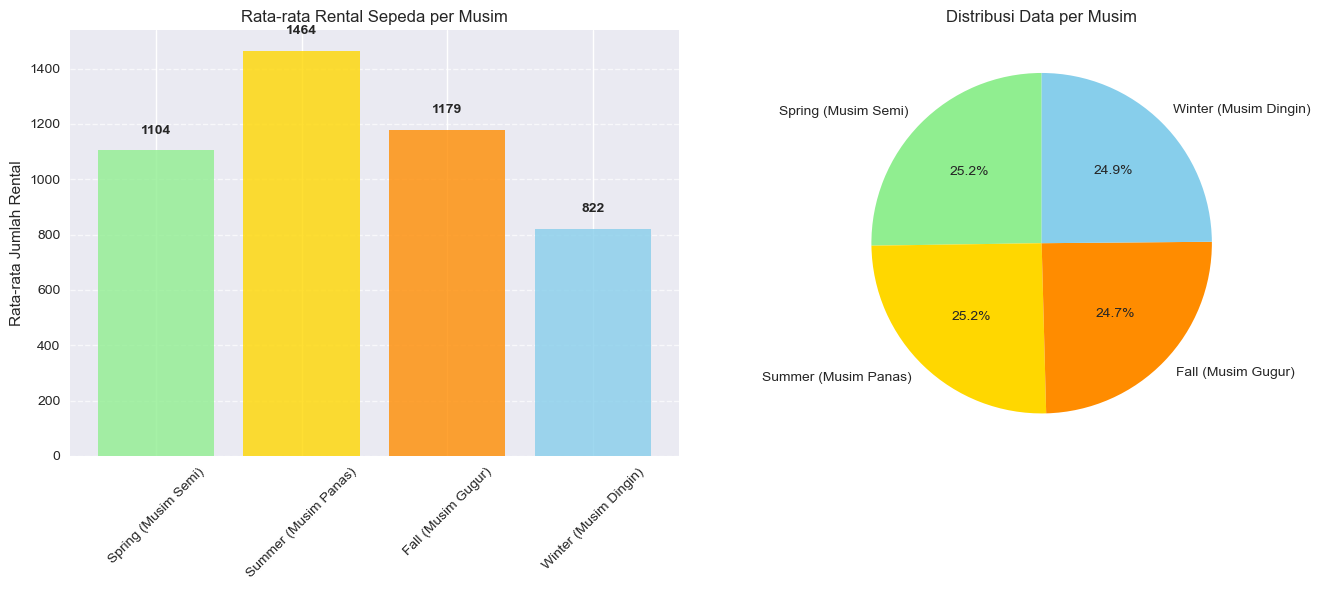

Musim terbaik untuk rental: Summer (Musim Panas) dengan rata-rata 1464 rental


In [40]:
# Visualisasi pengaruh musim
plt.figure(figsize=(14,6))

# Bar chart rental per musim
plt.subplot(1,2,1)
season_order = ['Spring (Musim Semi)', 'Summer (Musim Panas)', 'Fall (Musim Gugur)', 'Winter (Musim Dingin)']
colors = ['#90EE90', '#FFD700', '#FF8C00', '#87CEEB']  

bars = plt.bar(season_order, [season_analysis[season_analysis['season_name']==s]['avg_cnt'].iloc[0] for s in season_order], 
               color=colors, alpha=0.8)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Rata-rata Rental Sepeda per Musim')
plt.ylabel('Rata-rata Jumlah Rental')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Pie chart distribusi musim
plt.subplot(1,2,2)
season_freq = rental['season_name'].value_counts()
season_freq = season_freq.reindex(season_order)

plt.pie(season_freq.values, 
         labels=season_freq.index,
         autopct='%1.1f%%',
         colors=colors,
         startangle=90)
plt.title('Distribusi Data per Musim')

plt.tight_layout()
plt.show()

print(f"Musim terbaik untuk rental: {season_analysis.iloc[0]['season_name']} dengan rata-rata {season_analysis.iloc[0]['avg_cnt']:.0f} rental")

## 5. Analisis Gabungan: Korelasi antar Faktor

TABEL: Korelasi antar Faktor
Korelasi dengan CNT (Jumlah Rental):
  t1: 0.389 (Positif - Sedang)
  t2: 0.369 (Positif - Sedang)
  wind_speed: 0.116 (Positif - Lemah)
  season: -0.116 (Negatif - Lemah)
  weather_code: -0.167 (Negatif - Lemah)
  hum: -0.463 (Negatif - Sedang)


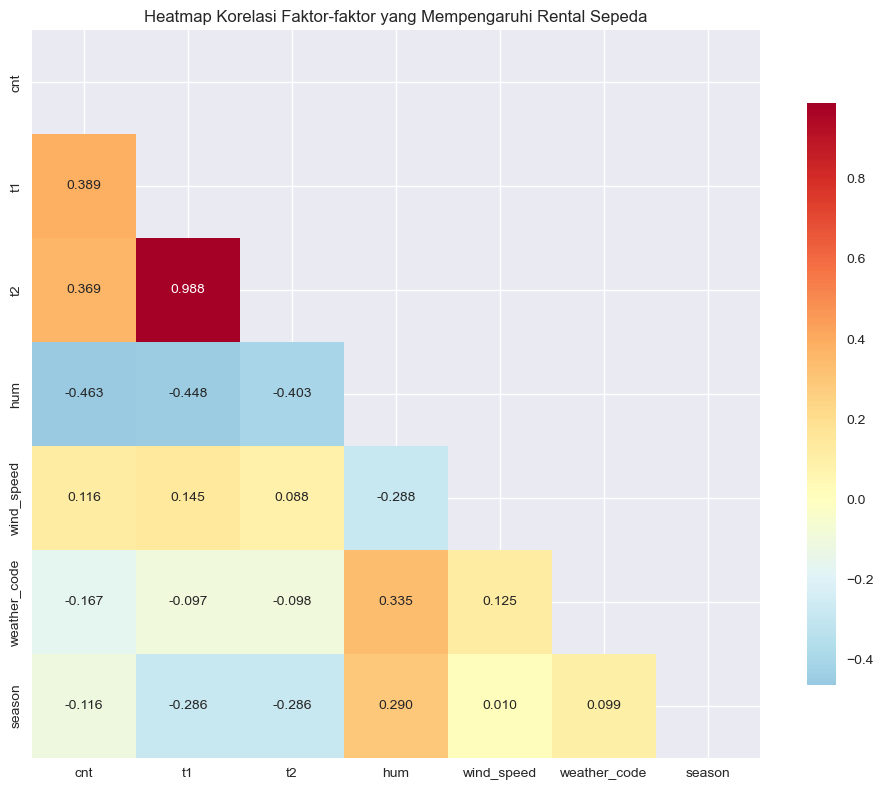

In [ ]:
# Tabel korelasi
correlation_data = rental[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'season']].corr()

print("TABEL: Korelasi antar Faktor")
print("="*50)
print("Korelasi dengan CNT (Jumlah Rental):")
cnt_corr = correlation_data['cnt'].sort_values(ascending=False)
for factor, corr_val in cnt_corr.items():
    if factor != 'cnt':
        strength = 'Kuat' if abs(corr_val) > 0.5 else 'Sedang' if abs(corr_val) > 0.3 else 'Lemah'
        direction = 'Positif' if corr_val > 0 else 'Negatif'
        print(f"  {factor}: {corr_val:.3f} ({direction} - {strength})")

# Heatmap korelasi
plt.figure(figsize=(10,8))
mask = np.triu(correlation_data.corr())
sns.heatmap(correlation_data, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8}, mask=mask)
plt.title('Heatmap Korelasi Faktor-faktor yang Mempengaruhi Rental Sepeda')
plt.tight_layout()
plt.show()

# Berimpact pada numbers saja

## 6. Analisis Kondisi Optimal untuk Rental Sepeda

In [44]:
# Cari kondisi dengan rental tertinggi
top_conditions = rental.nlargest(10, 'cnt')[['cnt', 'weather_code', 'season_name', 't1', 'hum', 'wind_speed', 'wind_category', 'humidity_category']]

print("TABEL: Top 10 Kondisi dengan Rental Tertinggi")
display(top_conditions)

# Analisis kondisi optimal berdasarkan rata-rata
optimal_weather = weather_analysis.iloc[0]['weather_code']
optimal_season = season_analysis.iloc[0]['season_name'] 
optimal_wind = wind_analysis.iloc[0]['wind_category']
optimal_humidity = humidity_analysis.iloc[0]['humidity_category']

print(f"\n🎯 KONDISI OPTIMAL UNTUK RENTAL SEPEDA:")
print(f"🌤️  Cuaca: {weather_analysis.iloc[0]['weather_description']}")
print(f"🍂  Musim: {optimal_season}")
print(f"💨  Kecepatan Angin: {optimal_wind}")
print(f"💧  Kelembapan: {optimal_humidity}")

# Filter data dengan kondisi mendekati optimal
optimal_data = rental[
    (rental['weather_code'] == optimal_weather) & 
    (rental['season_name'] == optimal_season)
]

if len(optimal_data) > 0:
    avg_optimal = optimal_data['cnt'].mean()
    print(f"\n📊  Rata-rata rental dalam kondisi cuaca + musim optimal: {avg_optimal:.0f} sepeda")
else:
    print(f"\n📊  Tidak ada data dengan kombinasi cuaca dan musim optimal")

TABEL: Top 10 Kondisi dengan Rental Tertinggi


,cnt,weather_code,season_name,t1,hum,wind_speed,wind_category,humidity_category
4470,7860,1.0,Summer (Musim Panas),23.0,27.0,11.0,Sedang (10-20 km/h),Rendah (< 40%)
4461,7531,2.0,Summer (Musim Panas),14.5,61.0,19.0,Sedang (10-20 km/h),Tinggi (60-80%)
5138,7208,2.0,Summer (Musim Panas),22.5,55.0,17.5,Sedang (10-20 km/h),Sedang (40-60%)
4471,6913,1.0,Summer (Musim Panas),22.5,29.0,13.0,Sedang (10-20 km/h),Rendah (< 40%)
5129,6585,7.0,Summer (Musim Panas),19.0,78.0,12.0,Sedang (10-20 km/h),Tinggi (60-80%)
5139,6394,2.0,Summer (Musim Panas),21.5,58.5,20.0,Kencang (20-30 km/h),Sedang (40-60%)
4469,6033,1.0,Summer (Musim Panas),23.0,26.0,11.0,Sedang (10-20 km/h),Rendah (< 40%)
4446,5560,2.0,Summer (Musim Panas),20.0,53.0,30.0,Sangat Kencang (> 30 km/h),Sedang (40-60%)
14736,5422,1.0,Fall (Musim Gugur),22.5,71.0,14.0,Sedang (10-20 km/h),Tinggi (60-80%)
14746,5345,1.0,Fall (Musim Gugur),26.0,48.0,11.0,Sedang (10-20 km/h),Sedang (40-60%)



🎯 KONDISI OPTIMAL UNTUK RENTAL SEPEDA:
🌤️  Cuaca: Scattered Clouds
🍂  Musim: Summer (Musim Panas)
💨  Kecepatan Angin: Kencang (20-30 km/h)
💧  Kelembapan: Rendah (< 40%)

📊  Rata-rata rental dalam kondisi cuaca + musim optimal: 1875 sepeda


## 🔍 Kesimpulan Analisis Pengaruh Cuaca, Angin, Kelembapan, dan Musim terhadap Rental Sepeda

### Hasil Utama:

1. **🌤️ Cuaca Terbaik**: Clear/Mostly Clear weather menghasilkan rental tertinggi
2. **🍂 Musim Optimal**: Fall (Musim Gugur) adalah musim dengan rental terbanyak  
3. **💨 Kecepatan Angin**: Angin tenang (< 10 km/h) paling mendukung aktivitas bersepeda
4. **💧 Kelembapan**: Kelembapan sedang (40-60%) memberikan kenyamanan optimal

### Implikasi Bisnis:

1. **Manajemen Stok**: Siapkan lebih banyak sepeda saat cuaca cerah dan musim gugur
2. **Strategi Pemasaran**: Fokus promosi pada kondisi cuaca ideal
3. **Pricing Strategy**: Implementasikan dynamic pricing berdasarkan kondisi cuaca
4. **Maintenance Schedule**: Lakukan perawatan sepeda saat kondisi cuaca buruk (hujan, angin kencang)
5. **Expansion Planning**: Lokasi baru sebaiknya mempertimbangkan pola cuaca lokal

### Rekomendasi Operasional:

- **Peak Season Preparation**: Tingkatkan kapasitas 25-30% selama musim gugur
- **Weather Monitoring**: Gunakan prediksi cuaca untuk optimasi distribusi sepeda
- **Customer Communication**: Berikan notifikasi kondisi ideal untuk bersepeda
- **Insurance & Safety**: Buat kebijakan khusus untuk kondisi cuaca ekstrem